In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

##### Définition de la fonction à approximer
Ici, $f(x) = 2x\cos(x)$

In [2]:
def f(x):
    return(2*x*np.cos(x))

##### Création noyau gaussien

In [3]:
def rbf_kernel(x,y,param):
    if y is None:
        y=x
    d = np.linalg.norm(x-y)**2
    return np.exp(-d/param)

In [4]:
#On crée nos points d'entraînements
X_train = np.linspace(-5,14,150)
n_train = len(X_train)

#On ajoute de l'aléatoire pour pouvoir observer l'effet de lambda sur le noyau gaussien, et voir si notre modèle surapprend
randomness = 5*random.uniform(size=len(X_train))
y_train = f(X_train)+randomness

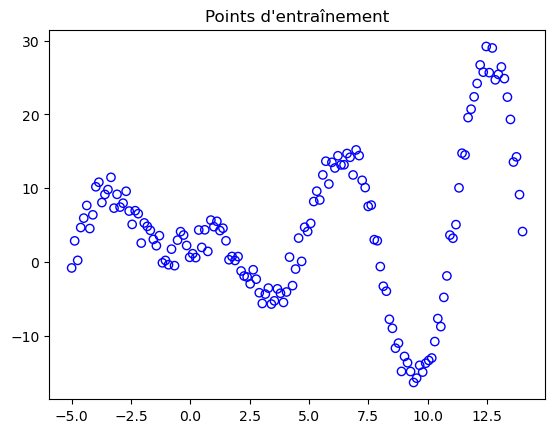

In [14]:
#On affiche les points créés
plt.figure()
plt.scatter(X_train,y_train,marker='o',facecolors='none',edgecolors='blue')
plt.title("Points d'entraînement")
plt.show()

##### Création de la matrice de Gram

In [6]:
def Gram_matrix(kernel,X,param):
    n = len(X)
    G = np.empty((n,n))

    for i in range(n):
        for j in range(n):
            G[i][j] = kernel(X[i],X[j],param)
    return(G)

In [15]:
lamb = 0.01
GM = Gram_matrix(rbf_kernel, X_train,param=1)
alpha = np.linalg.inv(GM + lamb*n_train*np.eye(n_train)) @ y_train

In [16]:
def f_chap(kernel,x,param):
    output = 0
    for i in range(n_train):
        output+= alpha[i]*kernel(X_train[i],x,param)
    return(output)

In [19]:
X_test = random.uniform(-5,14,size=300)
X_test.sort()
y_pred = [f_chap(rbf_kernel,x,param=1) for x in X_test]

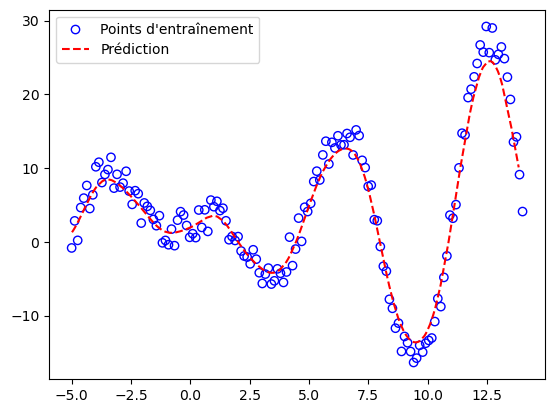

In [20]:
plt.figure()
plt.scatter(X_train,y_train,marker='o',facecolors='none',edgecolors='blue',label='Points d\'entraînement')
plt.plot(X_test,y_pred,'r--',label='Prédiction')
#plt.title('Régression Ridge avec noyau gaussien, $\lambda = 0.001$')
plt.legend()
plt.show()